In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.compat.v1.disable_eager_execution()


In [2]:
x_data = np.linspace(0.0,10.0,1000000)
noise = np.random.random(len(x_data))
noise.shape

(1000000,)

In [5]:
y_true = (0.5 * x_data) + 5 + noise
x_df = pd.DataFrame(data = x_data,columns=['x_data'])
y_df = pd.DataFrame(data = y_true,columns=['y'])
my_data = pd.concat([x_df,y_df],axis = 1)
my_data.head()

,x_data,y
0,0.00000,5.464985
1,0.00001,5.400468
2,0.00002,5.233899
3,0.00003,5.590496
4,0.00004,5.980100


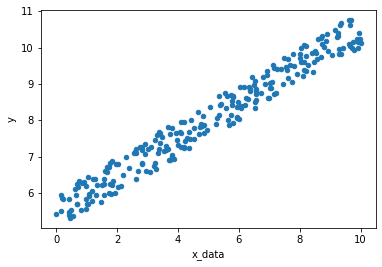

In [8]:
my_data.sample(n = 250).plot(kind ='scatter',x = 'x_data', y = 'y')


In [9]:
batch_size = 10
m = tf.Variable(0.34)
b = tf.Variable(0.86)
xph = tf.compat.v1.placeholder(tf.float32,[batch_size])
yph = tf.compat.v1.placeholder(tf.float32,[batch_size])

y_model = m*xph + b

error = tf.reduce_sum(tf.square(yph-y_model))
optimizer = tf.compat.v1.Gradoptimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate= 0.001)
train = optimizer.minimize(error)

sess = tf.compat.v1.InteractiveSession()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)
batches = 8000
for i in range(batches):
    rand_ind = np.random.randint(len(x_data),size=batch_size)
    feed ={xph:x_data[rand_ind],yph:y_true[rand_ind]}
    sess.run(train,feed_dict= feed)
model_m, model_b =sess.run([m,b])

5.5011535 0.49342817


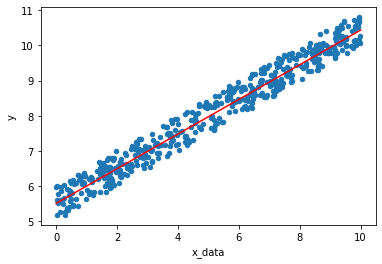

In [12]:
y_hat =x_data*model_m +model_b
my_data.sample(500).plot(kind='scatter',x = 'x_data',y='y')
plt.plot(x_data,y_hat,'r')
print(model_b,model_m)